# Regressão linear com Python


Seu vizinho é um agente imobiliário e quer alguma ajuda a prever os preços das casas para as regiões nos EUA. Seria ótimo se você pudesse de alguma forma criar um modelo para ela que lhe permita colocar algumas características de uma casa e retornar uma estimativa de quanto a casa venderia.

Ela perguntou se você poderia ajudá-la com suas novas habilidades de ciência de dados. Você diz sim e decide que a Regressão Linear pode ser um bom caminho para resolver esse problema.

Seu vizinho, em seguida, dá-lhe algumas informações sobre um monte de casas em regiões dos Estados Unidos. tudo está contido no arquivo: USA_Housing.csv.

Os dados contém as seguintes colunas:

* 'Avg. Area Income': Média da renda dos residentes de onde a casa está localizada.
* 'Avg. Area House Age': Média de idade das casas da mesma cidade.
* 'Avg. Area Number of Rooms': Número médio de quartos para casas na mesma cidade.
* 'Avg. Area Number of Bedrooms': Número médio de quartos para casas na mesma cidade
* 'Area Population': A população da cidade onde a casa está localizada.
* 'Price': Preço de venda da casa.
* 'Address': Endereço da casa;

## Confira os dados
Nós conseguimos obter alguns dados do seu vizinho para os preços da habitação como um conjunto de csv, vamos preparar nosso ambiente com as bibliotecas que precisaremos e depois importar os dados!
### Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Confira os dados

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Análise exploratória de dados

Vamos criar alguns plots simples para verificar os dados.

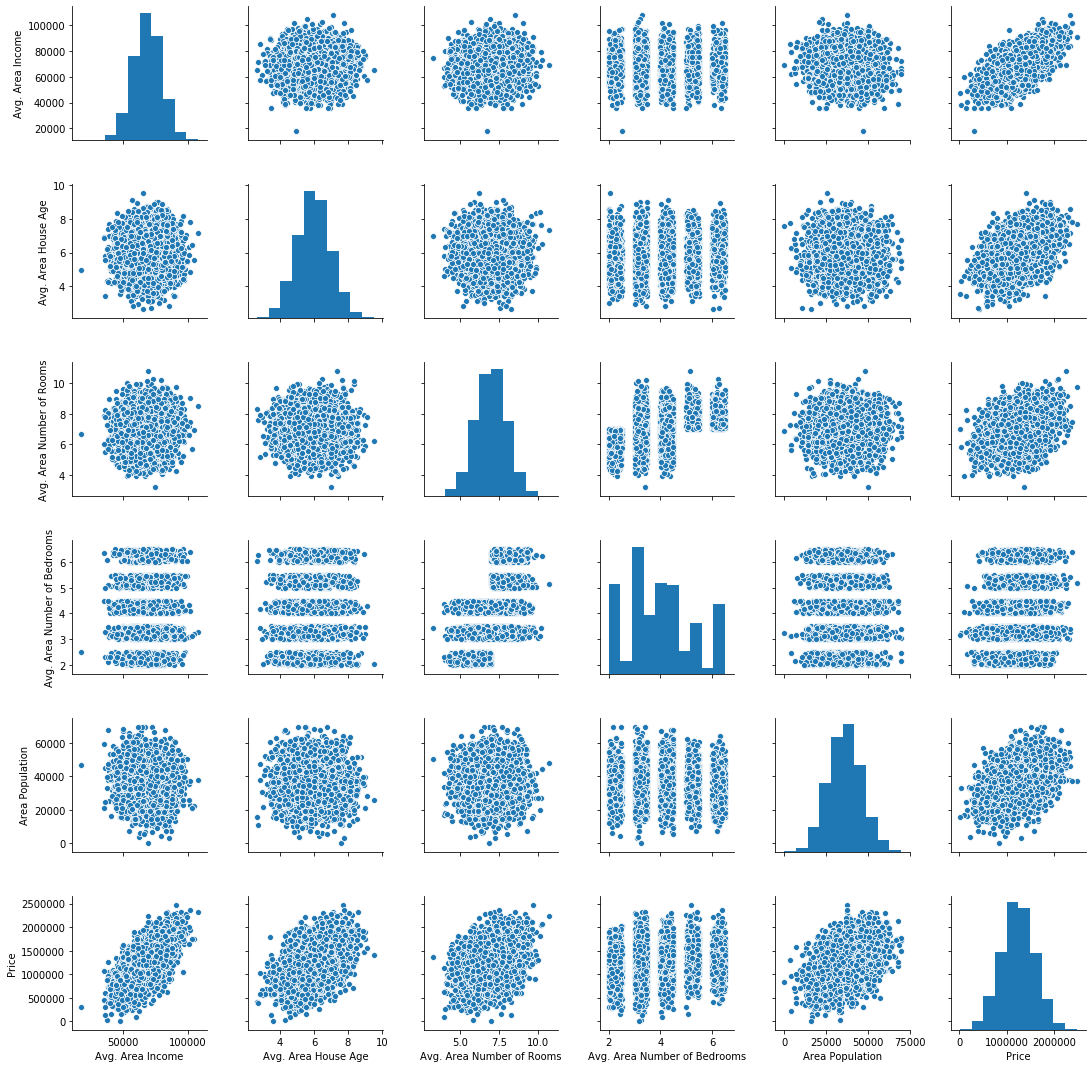

In [7]:
sns.pairplot(USAhousing)

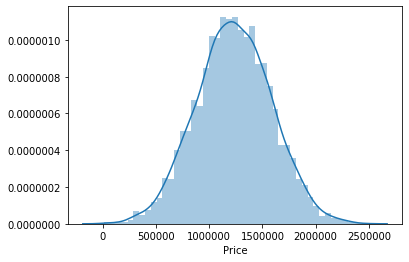

In [8]:
sns.distplot(USAhousing['Price'])

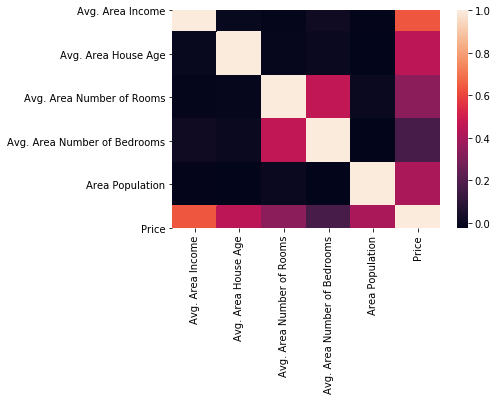

In [9]:
sns.heatmap(USAhousing.corr())

## Treinando um modelo de regressão linear

Vamos agora começar a treinar o modelo de regressão. Precisamos primeiro dividir nossos dados em uma matriz X que contém os recursos para treinar, e uma matriz y com a variável alvo, neste caso, a coluna Preço. Vamos descartar a coluna "Adress" porque só tem informações de texto que o modelo de regressão linear não pode usar.

### Arrays X e y

In [10]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Split de treino

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos criar o modelo usando o conjunto de treinamento e depois usar o conjunto de testes para avaliar o modelo.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Criando e treinando o modelo

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()

In [15]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Avaliação modelo

Vamos avaliar o modelo ao verificar os coeficientes e como podemos interpretá-los.

In [16]:
# Printando a intercepção. Quando y=0
print(lm.intercept_)

-2640159.7968525263


In [17]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

Interpretando os coeficientes:

- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em **Avg. Area Income** está associado a um **aumento de \$ 21,52**.
- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em **Avg. Area House Age** está associada a um **aumento de \$ 164883.28**.
- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em **Avg. Area Number of Bedrooms** está associada a um **aumento de \$ 122368.67**.
- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em **Avg. Area Number of Bedrooms** está associada a um **aumento de \$ 2233.80**.
- Mantendo todas as outras variáveis constantes, um aumento de 1 unidade em **Area Population ** está associado a um ** aumento de \$ 15.15**.

Isso faz sentido? Provavelmente não porque esses dados não são reais. Se quiser dados reais para repetir este tipo de análise, confira o [conjunto de dados de Boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):


    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predições do nosso modelo

Vamos pegar as previsões em nosso conjunto de testes e ver o quão bem!

In [18]:
predictions = lm.predict(X_test)

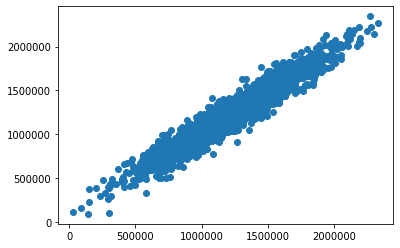

In [19]:
plt.scatter(y_test,predictions)

**Histograma residual**

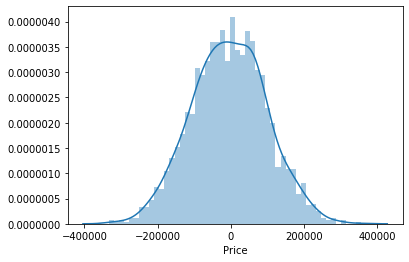

In [20]:
sns.distplot((y_test-predictions),bins=50);

## Métricas de avaliação de regressão


Aqui estão três métricas de avaliação comuns para problemas de regressão:

**Mean absolute error** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Square Error** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparando estas métricas:

- **MAE** é o mais fácil de entender, porque é o erro médio.
- **MSE** é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
- **RMSE** é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".

Todas estas são **funções de perda**, porque queremos minimizá-las.

In [21]:
#https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914948
MSE: 10460958907.209059
RMSE: 102278.82922290936


Este foi o seu primeiro projeto de Machine Learning real! Parabéns em ajudar o seu vizinho! 